In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<ipython-input-4-2784ae5e79db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


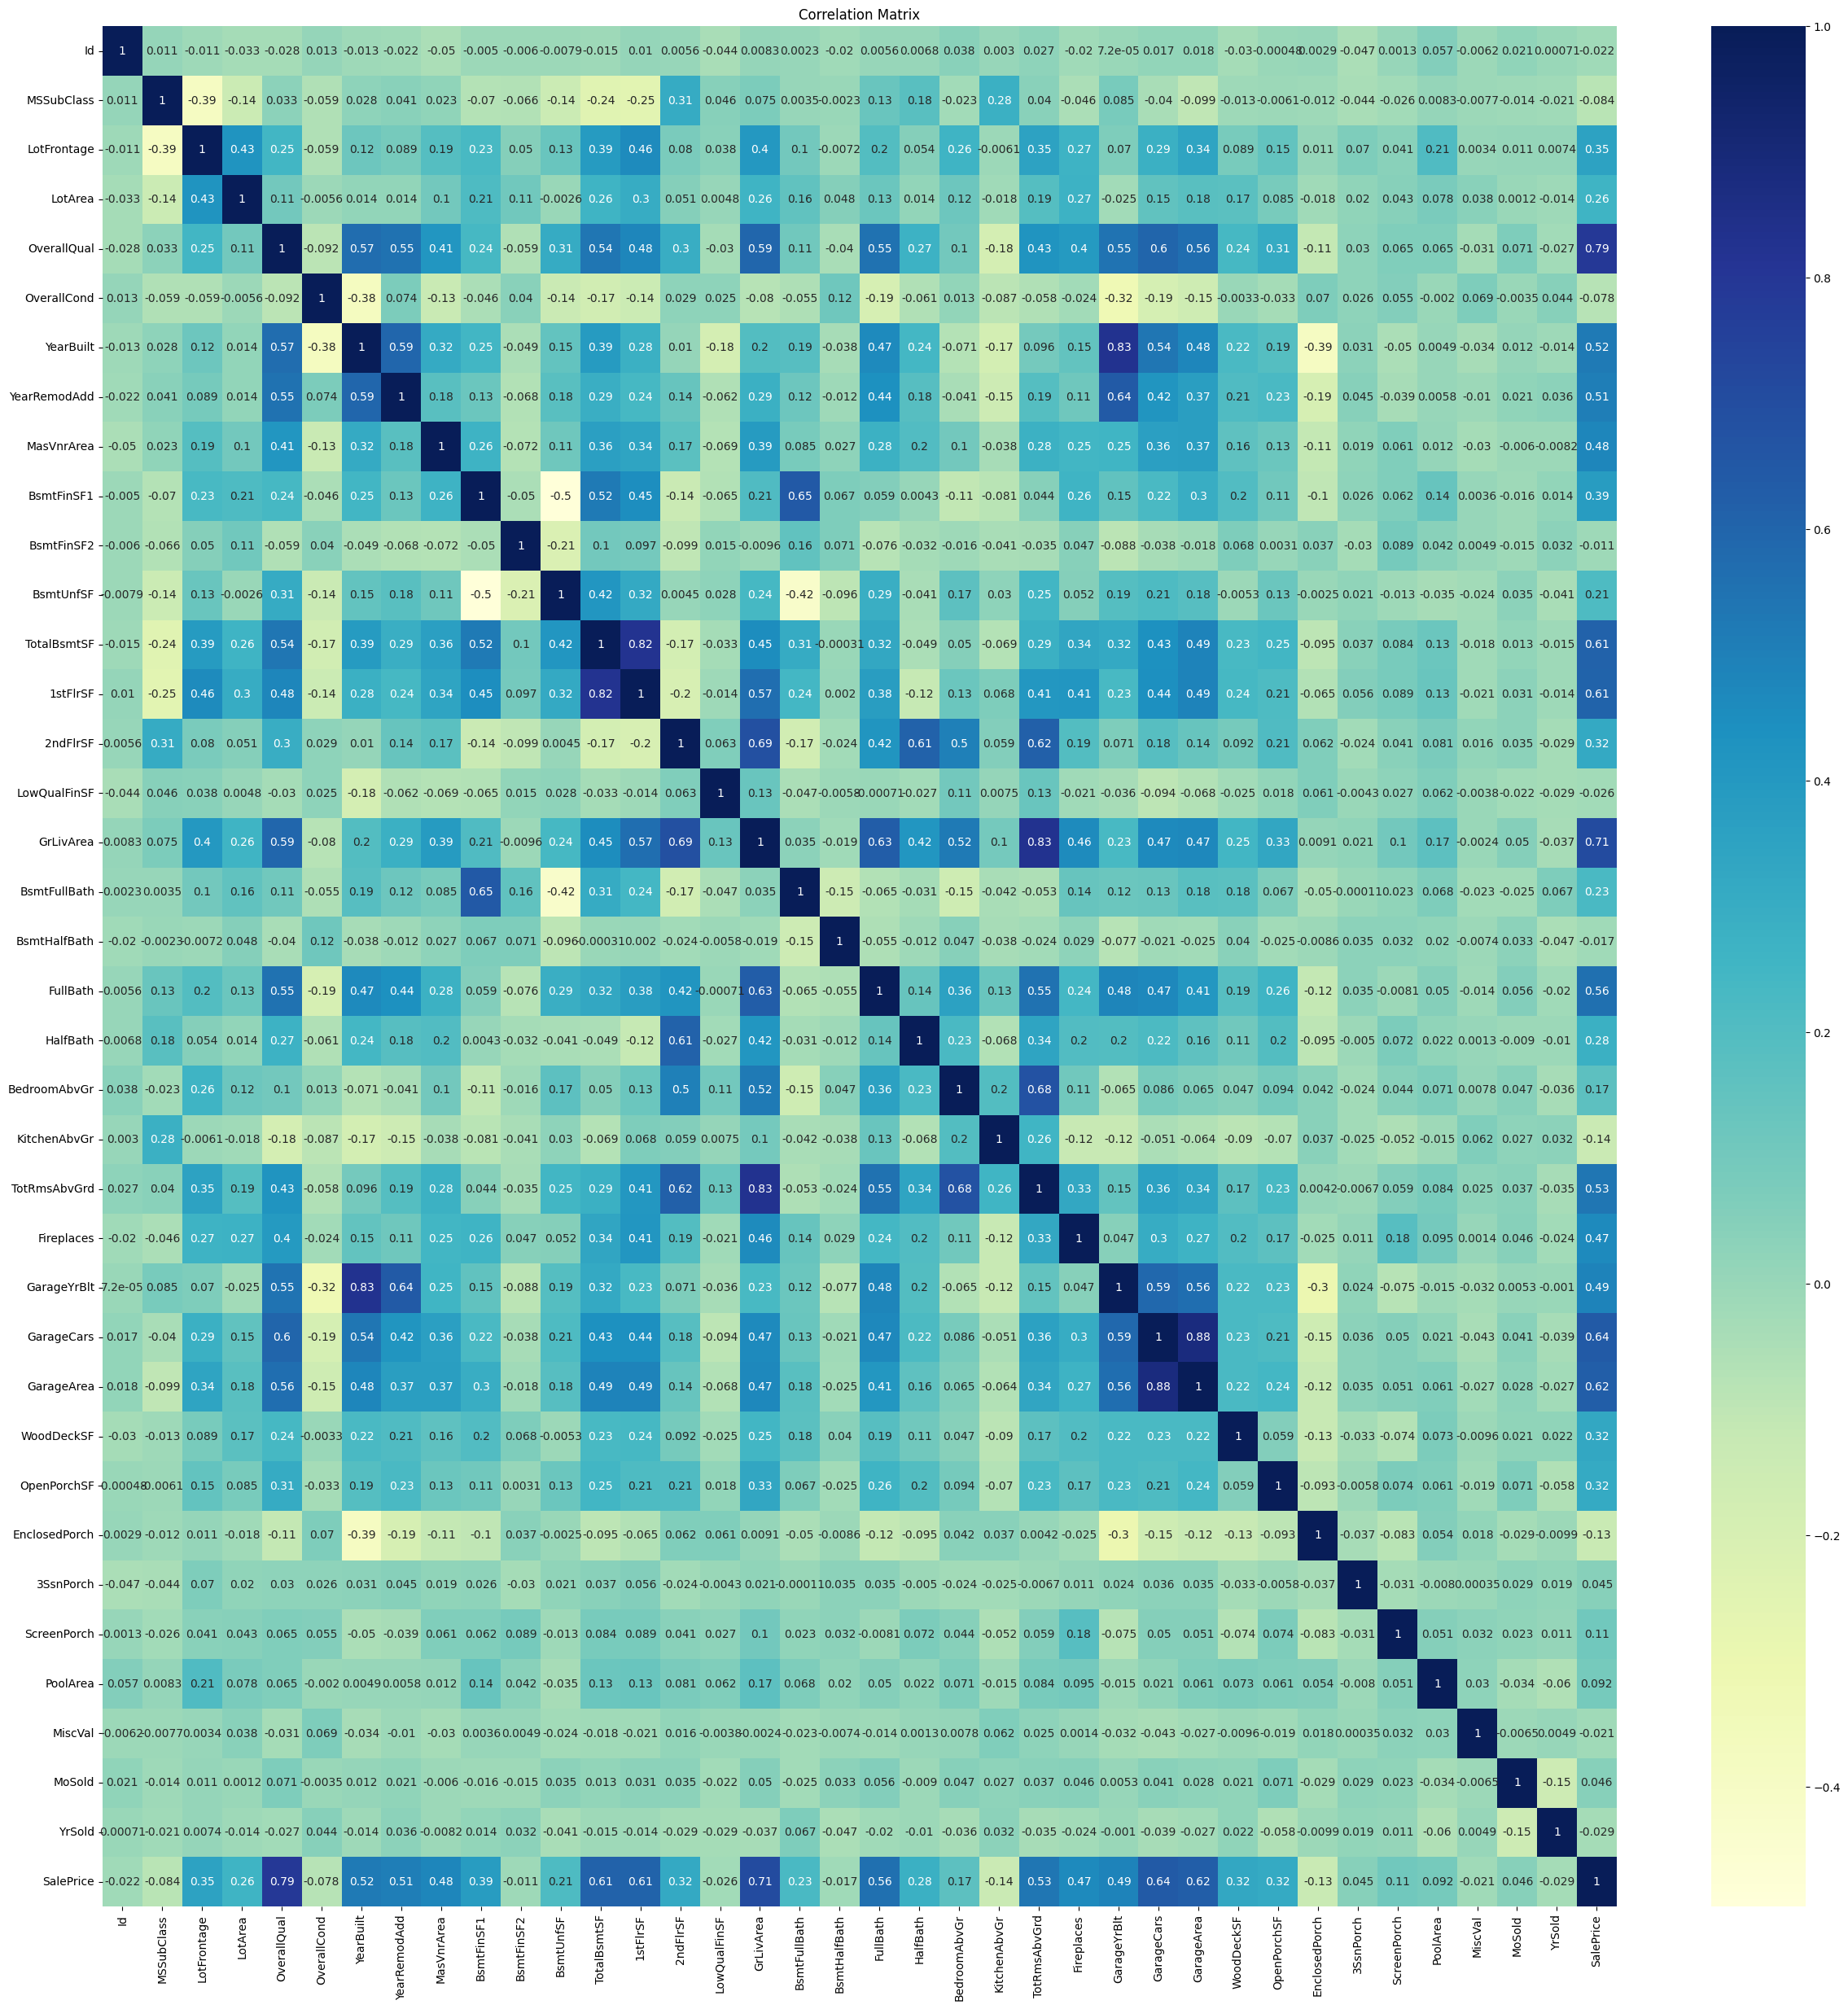

In [4]:
correlation_matrix = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

In [5]:
df['Bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']

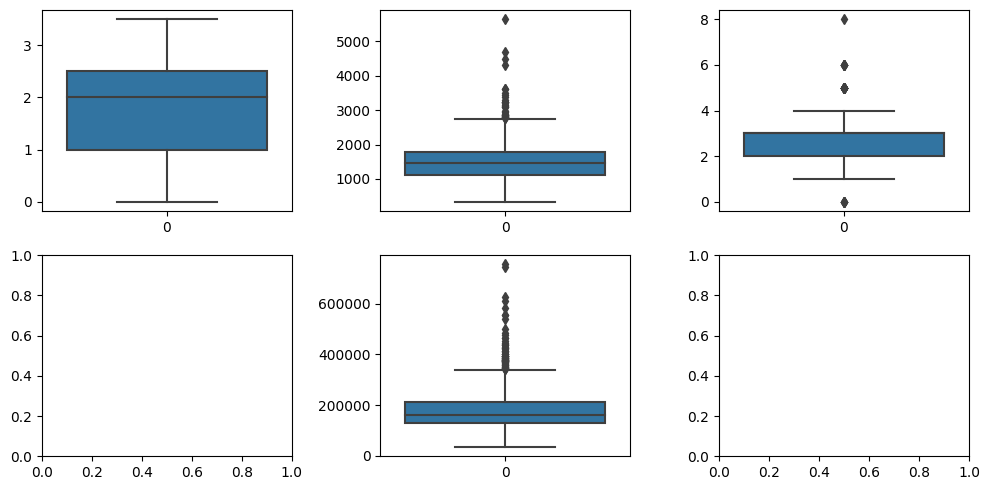

In [6]:
fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(df['Bathrooms'], ax = axs[0,0])
plt2 = sns.boxplot(df['GrLivArea'], ax = axs[0,1])
plt3 = sns.boxplot(df['BedroomAbvGr'], ax = axs[0,2])
plt1 = sns.boxplot(df['SalePrice'], ax = axs[1,1])

plt.tight_layout()

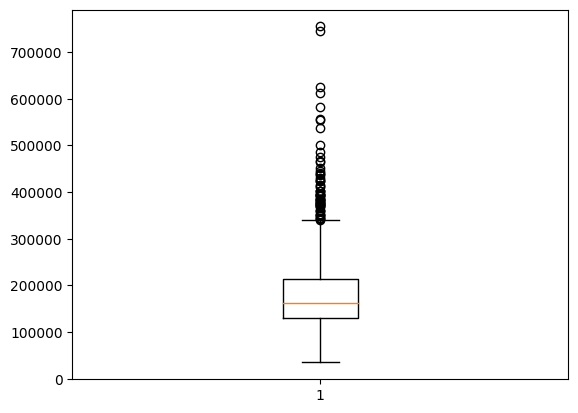

In [7]:
# FOR PRICE
plt.boxplot(df.SalePrice)
Q1 = df.SalePrice.quantile(0.25)
Q3 = df.SalePrice.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.SalePrice >= Q1 - 1.5*IQR) & (df.SalePrice <= Q3 + 1.5*IQR)]

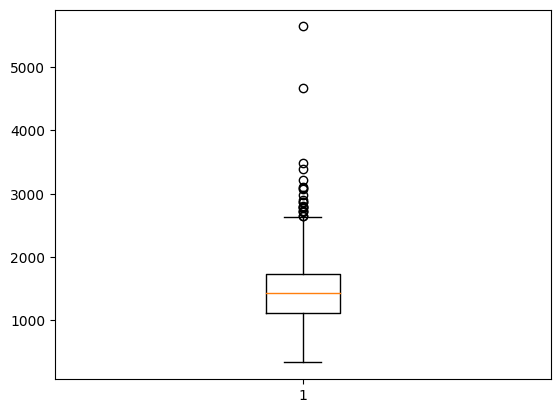

In [8]:
# FOR AREA
plt.boxplot(df.GrLivArea)
Q1 = df.GrLivArea.quantile(0.25)
Q3 = df.GrLivArea.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.GrLivArea >= Q1 - 1.5*IQR) & (df.GrLivArea <= Q3 + 1.5*IQR)]

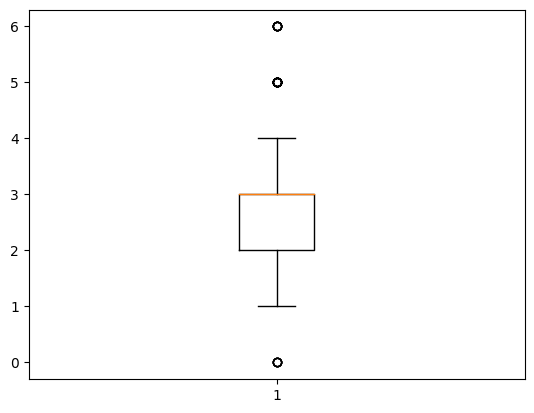

In [9]:
# FOR BEDROOM
plt.boxplot(df.BedroomAbvGr)
Q1 = df.BedroomAbvGr.quantile(0.25)
Q3 = df.BedroomAbvGr.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.BedroomAbvGr >= Q1 - 1.5*IQR) & (df.BedroomAbvGr <= Q3 + 1.5*IQR)]

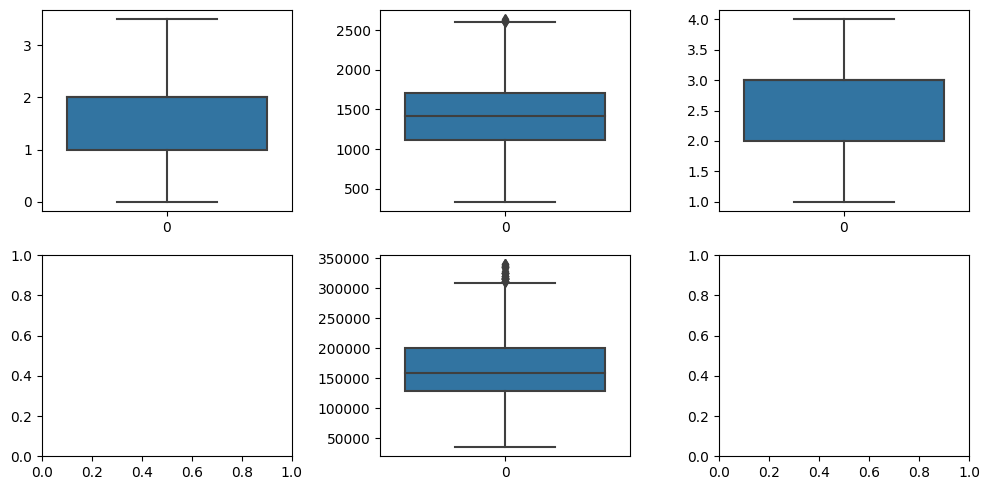

In [10]:
#RE-ANALYSIS
fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(df['Bathrooms'], ax = axs[0,0])
plt2 = sns.boxplot(df['GrLivArea'], ax = axs[0,1])
plt3 = sns.boxplot(df['BedroomAbvGr'], ax = axs[0,2])
plt1 = sns.boxplot(df['SalePrice'], ax = axs[1,1])

plt.tight_layout()

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Bathrooms
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2.5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2.5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2.5


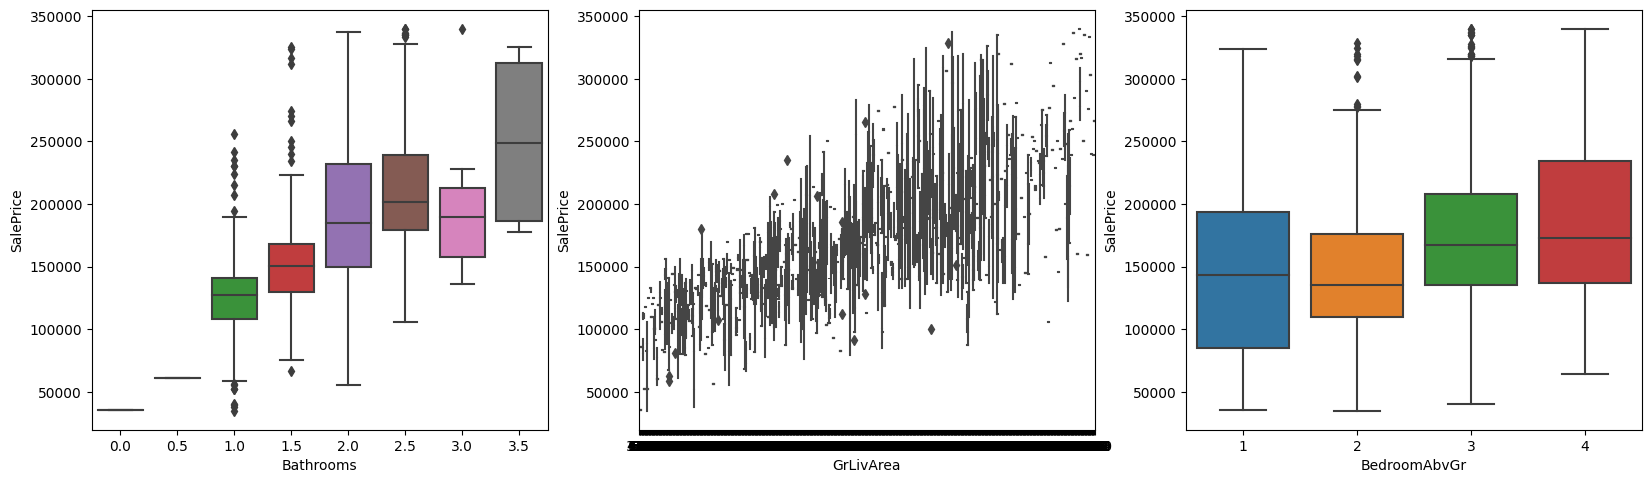

In [12]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'Bathrooms', y = 'SalePrice', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'GrLivArea', y = 'SalePrice', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'BedroomAbvGr', y = 'SalePrice', data = df)

plt.show()

In [13]:
columns_to_keep = ['GrLivArea', 'BedroomAbvGr', 'Bathrooms', 'SalePrice']
df = df[columns_to_keep]
print(df)

      GrLivArea  BedroomAbvGr  Bathrooms  SalePrice
0          1710             3        2.5     208500
1          1262             3        2.0     181500
2          1786             3        2.5     223500
3          1717             3        1.0     140000
4          2198             4        2.5     250000
...         ...           ...        ...        ...
1455       1647             3        2.5     175000
1456       2073             3        2.0     210000
1457       2340             4        2.0     266500
1458       1078             2        1.0     142125
1459       1256             3        1.5     147500

[1350 rows x 4 columns]


In [14]:
X = df[['GrLivArea', 'BedroomAbvGr', 'Bathrooms']]
y = df['SalePrice']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1410115875.3391643
R-squared: 0.5540888964675438


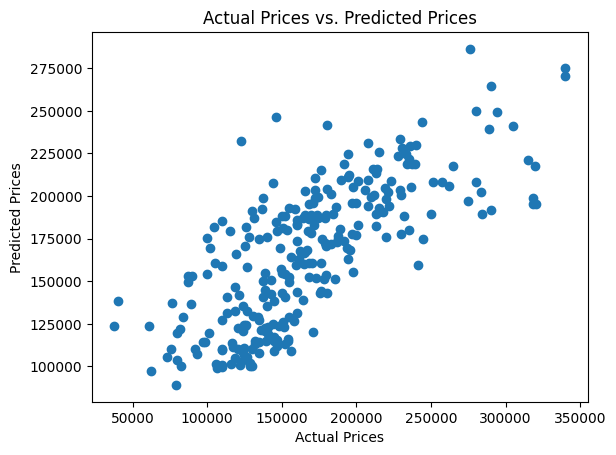

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

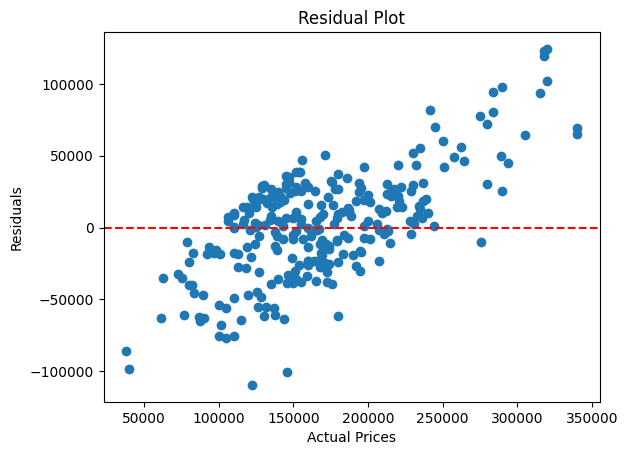

In [19]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

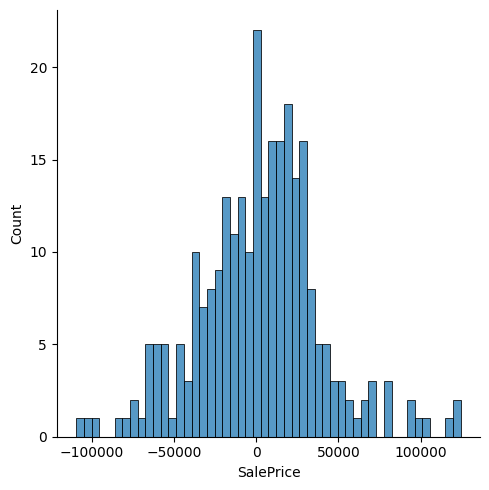

In [20]:
sns.displot((y_test-y_pred), bins=50)

In [21]:
d = pd.read_csv("/content/test.csv")
d

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [22]:
d['Bathrooms'] = d['FullBath'] + 0.5 * d['HalfBath']

In [24]:
columns_to_keep = ['GrLivArea', 'BedroomAbvGr', 'Bathrooms']
d = d[columns_to_keep]

In [25]:
X_test = d[['GrLivArea', 'BedroomAbvGr', 'Bathrooms']]

In [26]:
predicted_prices = lr.predict(X_test)

In [27]:
d['Predicted_Price'] = predicted_prices
d

<ipython-input-27-5a988f130e82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Predicted_Price'] = predicted_prices


,GrLivArea,BedroomAbvGr,Bathrooms,Predicted_Price
0,896,2,1.0,117376.515113
1,1329,3,1.5,150798.544860
2,1629,3,2.5,200473.394864
3,1604,3,2.5,198202.050232
4,1280,2,2.0,174683.083078
...,...,...,...,...
1454,1092,3,1.5,129266.197756
1455,1092,3,1.5,129266.197756
1456,1224,4,1.0,112922.523713
1457,970,3,1.0,106972.678741


Text(0, 0.5, 'y_pred')

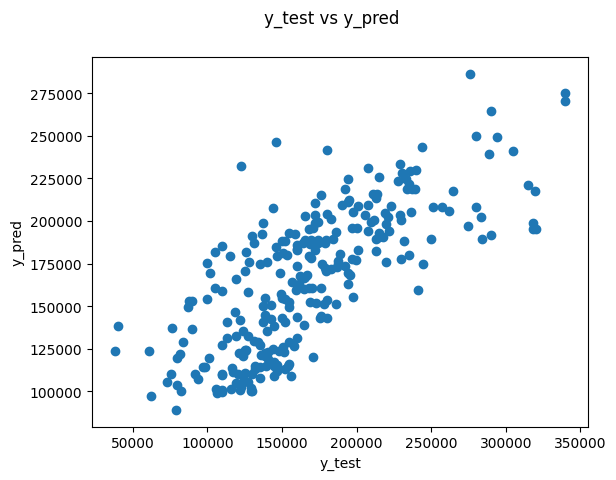

In [28]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [29]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.5540888964675438


In [30]:
print(d)

      GrLivArea  BedroomAbvGr  Bathrooms  Predicted_Price
0           896             2        1.0    117376.515113
1          1329             3        1.5    150798.544860
2          1629             3        2.5    200473.394864
3          1604             3        2.5    198202.050232
4          1280             2        2.0    174683.083078
...         ...           ...        ...              ...
1454       1092             3        1.5    129266.197756
1455       1092             3        1.5    129266.197756
1456       1224             4        1.0    112922.523713
1457        970             3        1.0    106972.678741
1458       2000             3        2.5    234180.149191

[1459 rows x 4 columns]


In [31]:
pd.DataFrame(d).to_csv("Predictions.csv", index=True)